In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats

import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import string
import random
import string
from sklearn import linear_model
from scipy.spatial import distance

In [2]:
# load in the raw data for recipes and ratings
raw_recipes = pd.read_csv(os.path.join('archive', 'RAW_recipes.csv'))
raw_interactions = pd.read_csv(os.path.join('archive', 'RAW_interactions.csv'))

In [3]:
raw_interactions.shape[0]

731927

In [4]:
raw_interactions

,user_id,recipe_id,date,rating,review
0,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
1,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
2,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
3,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
4,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...
...,...,...,...,...,...
731922,2002357020,82303,2018-12-05,5,Delicious quick thick chocolate sauce with ing...
731923,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
731924,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
731925,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [5]:
raw_interactions.dtypes

user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object

In [6]:
raw_interactions['date'] = pd.to_datetime(raw_interactions['date'])


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords from NLTK
#nltk.download('punkt')
#nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to tokenize and remove stopwords
def clean_text(review):
    # Check if the review is a string
    if isinstance(review, str):
        tokens = word_tokenize(review)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        return " ".join(filtered_tokens)
    else:
        # Return empty string for non-string or missing values
        return ""

# Apply the function to the review column
raw_interactions['cleaned_review'] = raw_interactions['review'].apply(clean_text)


In [8]:
raw_interactions

,user_id,recipe_id,date,rating,review,cleaned_review
0,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...","simple , delicious ! Great chilly fall evening..."
1,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,made Mexican topping took bunko . Everyone lov...
2,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...","Made cheddar bacon topping , adding sprinkling..."
3,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo...","observation , rate . followed procedure strawb..."
4,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...,recipe OVERLY sweet . would start 1/3 1/4 cup ...
...,...,...,...,...,...,...
731922,2002357020,82303,2018-12-05,5,Delicious quick thick chocolate sauce with ing...,Delicious quick thick chocolate sauce ingredie...
731923,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...,delicious ! husband truly enjoyed burgers . te...
731924,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...,WOW ! Sometimes n't take time rate recipes one...
731925,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...,good ! used regular port well . gravy nicely f...


In [9]:
#Import lib
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale = 1.3)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

%config InlineBackend.figure_formats = ['svg']
plt.rcParams["figure.figsize"] = [12, 6]

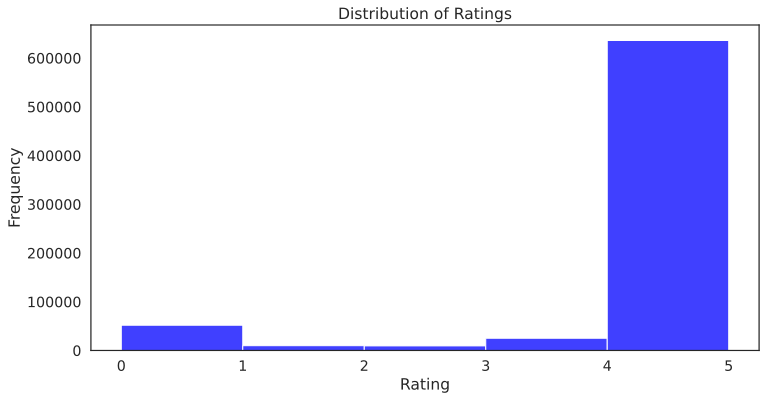

In [23]:
# Create the distribution plot
sns.histplot(raw_interactions['rating'], kde=False, bins=5, color='blue')

# Set the title and labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Save the plot before showing it
plt.savefig('distribution_of_ratings.png')

# Show the plot
plt.show()


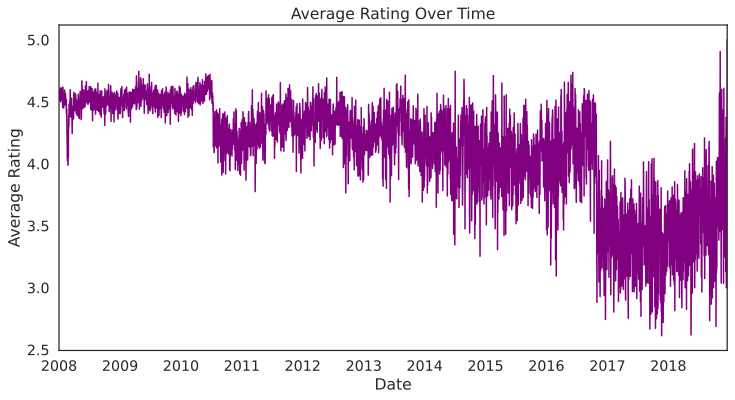

In [24]:
# Assuming your DataFrame is named raw_interactions
# Group the data by date and calculate the average rating for each date
average_ratings_per_day = raw_interactions.groupby('date')['rating'].mean()

# Plotting the time series of average ratings
average_ratings_per_day.plot(kind='line', color='purple')

# Set the title and labels
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.savefig('rating_data_relation.png')
# Show the plot
plt.show()


In [12]:
#pip install textblob

In [28]:
raw_interactions

,user_id,recipe_id,date,rating,review,cleaned_review,sentiment
0,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...","simple , delicious ! Great chilly fall evening...",0.212500
1,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,made Mexican topping took bunko . Everyone lov...,0.350000
2,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...","Made cheddar bacon topping , adding sprinkling...",-0.208333
3,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo...","observation , rate . followed procedure strawb...",-0.037500
4,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...,recipe OVERLY sweet . would start 1/3 1/4 cup ...,0.231389
...,...,...,...,...,...,...,...
731922,2002357020,82303,2018-12-05,5,Delicious quick thick chocolate sauce with ing...,Delicious quick thick chocolate sauce ingredie...,0.431667
731923,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...,delicious ! husband truly enjoyed burgers . te...,0.339904
731924,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...,WOW ! Sometimes n't take time rate recipes one...,0.454861
731925,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...,good ! used regular port well . gravy nicely f...,0.543750


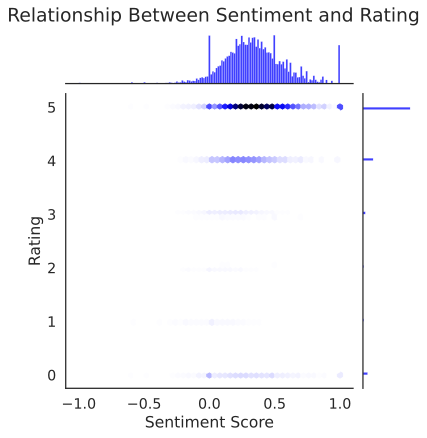

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to create a new column for sentiment
raw_interactions['sentiment'] = raw_interactions['cleaned_review'].apply(calculate_sentiment)




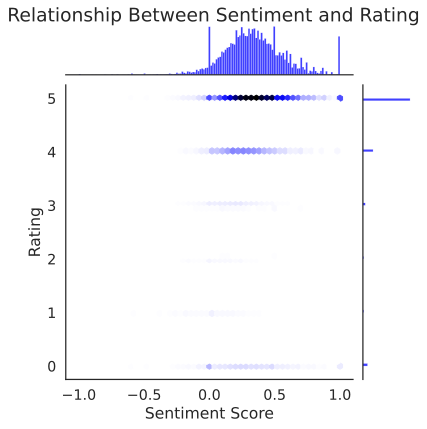

In [44]:
# Downsample the data to 10% of its original size
downsampled_interactions = raw_interactions.sample(frac=0.1, random_state=1)

sns.jointplot(x='sentiment', y='rating', kind="hex", data=downsampled_interactions, color="blue")

plt.suptitle('Relationship Between Sentiment and Rating',y=1) # Adjust title position
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.savefig('sentiment_rating.png')
plt.show()


In [ ]:
nUsers = raw_interactions["user_id"].nunique()

In [ ]:
nItems = raw_interactions["recipe_id"].nunique()

In [ ]:
nItems

In [ ]:
allRecipe = [tuple(r) for r in raw_interactions[['user_id', 'recipe_id', 'rating']].to_numpy()]

In [ ]:
userIDs,itemIDs = {},{}

In [ ]:
for t in allRecipe:
    u,i = t[0],t[1]
    if not u in userIDs: userIDs[u] = len(userIDs)
    if not i in itemIDs: itemIDs[i] = len(itemIDs)

In [ ]:
userIDs

In [ ]:
nUsers,nItems = len(userIDs),len(itemIDs)

In [ ]:
nUsers,nItems

In [ ]:
X = scipy.sparse.lil_matrix((len(allRecipe), nUsers + nItems))

In [ ]:
allRecipe[0]

In [ ]:
for i in range(len(allRecipe)):
    user = userIDs[allRecipe[i][0]]
    item = itemIDs[allRecipe[i][1]]
    X[i,user] = 1 # One-hot encoding of user
    X[i,nUsers + item] = 1 # One-hot encoding of item

In [ ]:
y = np.array([d[2] for d in allRecipe])

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
1132367//2

In [ ]:
(1132367 - 566183) // 5

In [ ]:
113236 * 3

In [ ]:
1132367 - 566183 - 339708

In [ ]:
566183 + 339708

In [ ]:
X_train,y_train = X[:566183],y[:566183]
X_valid,y_valid = X[566183:905891],y[566183:905891]
X_test,y_test = X[905891:],y[905891:]

In [ ]:
import fastFM

In [ ]:
from fastFM import als

In [ ]:
fm = als.FMRegression(n_iter=500, init_stdev=0.05, rank=2, l2_reg_w=5, l2_reg_V=58)
fm.fit(X_train, y_train)

In [ ]:
y_pred = fm.predict(X_valid)

In [ ]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [ ]:
MSE(y_pred,y_valid)